In [8]:
!pip install apyori

In [9]:
import pandas as pd   # manipulacion y analisis de datos
import numpy as np    #vectores y matrices de n dimensiones
import matplotlib.pyplot as plt   #generar graficas apartir de de los datos
from apyori import apriori

In [61]:
DatosMarket = pd.read_csv('Market.csv')
DatosMarket

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
#se incluyen todas las transacciones en una sola lista
# -1 significa dimension no conocida
Transacciones = DatosMarket.values.reshape(-1).tolist()
Lista = pd.DataFrame(Transacciones)
Lista
Lista['Frecuencia'] = 1
Lista

,0,Frecuencia
0,burgers,1
1,meatballs,1
2,eggs,1
3,NaN,1
4,NaN,1
...,...,...
149995,NaN,1
149996,NaN,1
149997,NaN,1
149998,NaN,1


In [63]:
#Agrupando los elemntos 
#Se agrupa los elementos
Lista = Lista.groupby(by=[0], as_index=False).count().sort_values(by=['Frecuencia'], ascending=True) #Conteo
Lista['Porcentaje'] = (Lista['Frecuencia'] / Lista['Frecuencia'].sum()) #Porcentaje
Lista = Lista.rename(columns={0 : 'Item'})
Lista

,Item,Frecuencia,Porcentaje
0,asparagus,1,0.000034
112,water spray,3,0.000102
77,napkins,5,0.000170
34,cream,7,0.000239
11,bramble,14,0.000477
...,...,...,...
25,chocolate,1230,0.041918
43,french fries,1282,0.043690
100,spaghetti,1306,0.044508
37,eggs,1348,0.045939


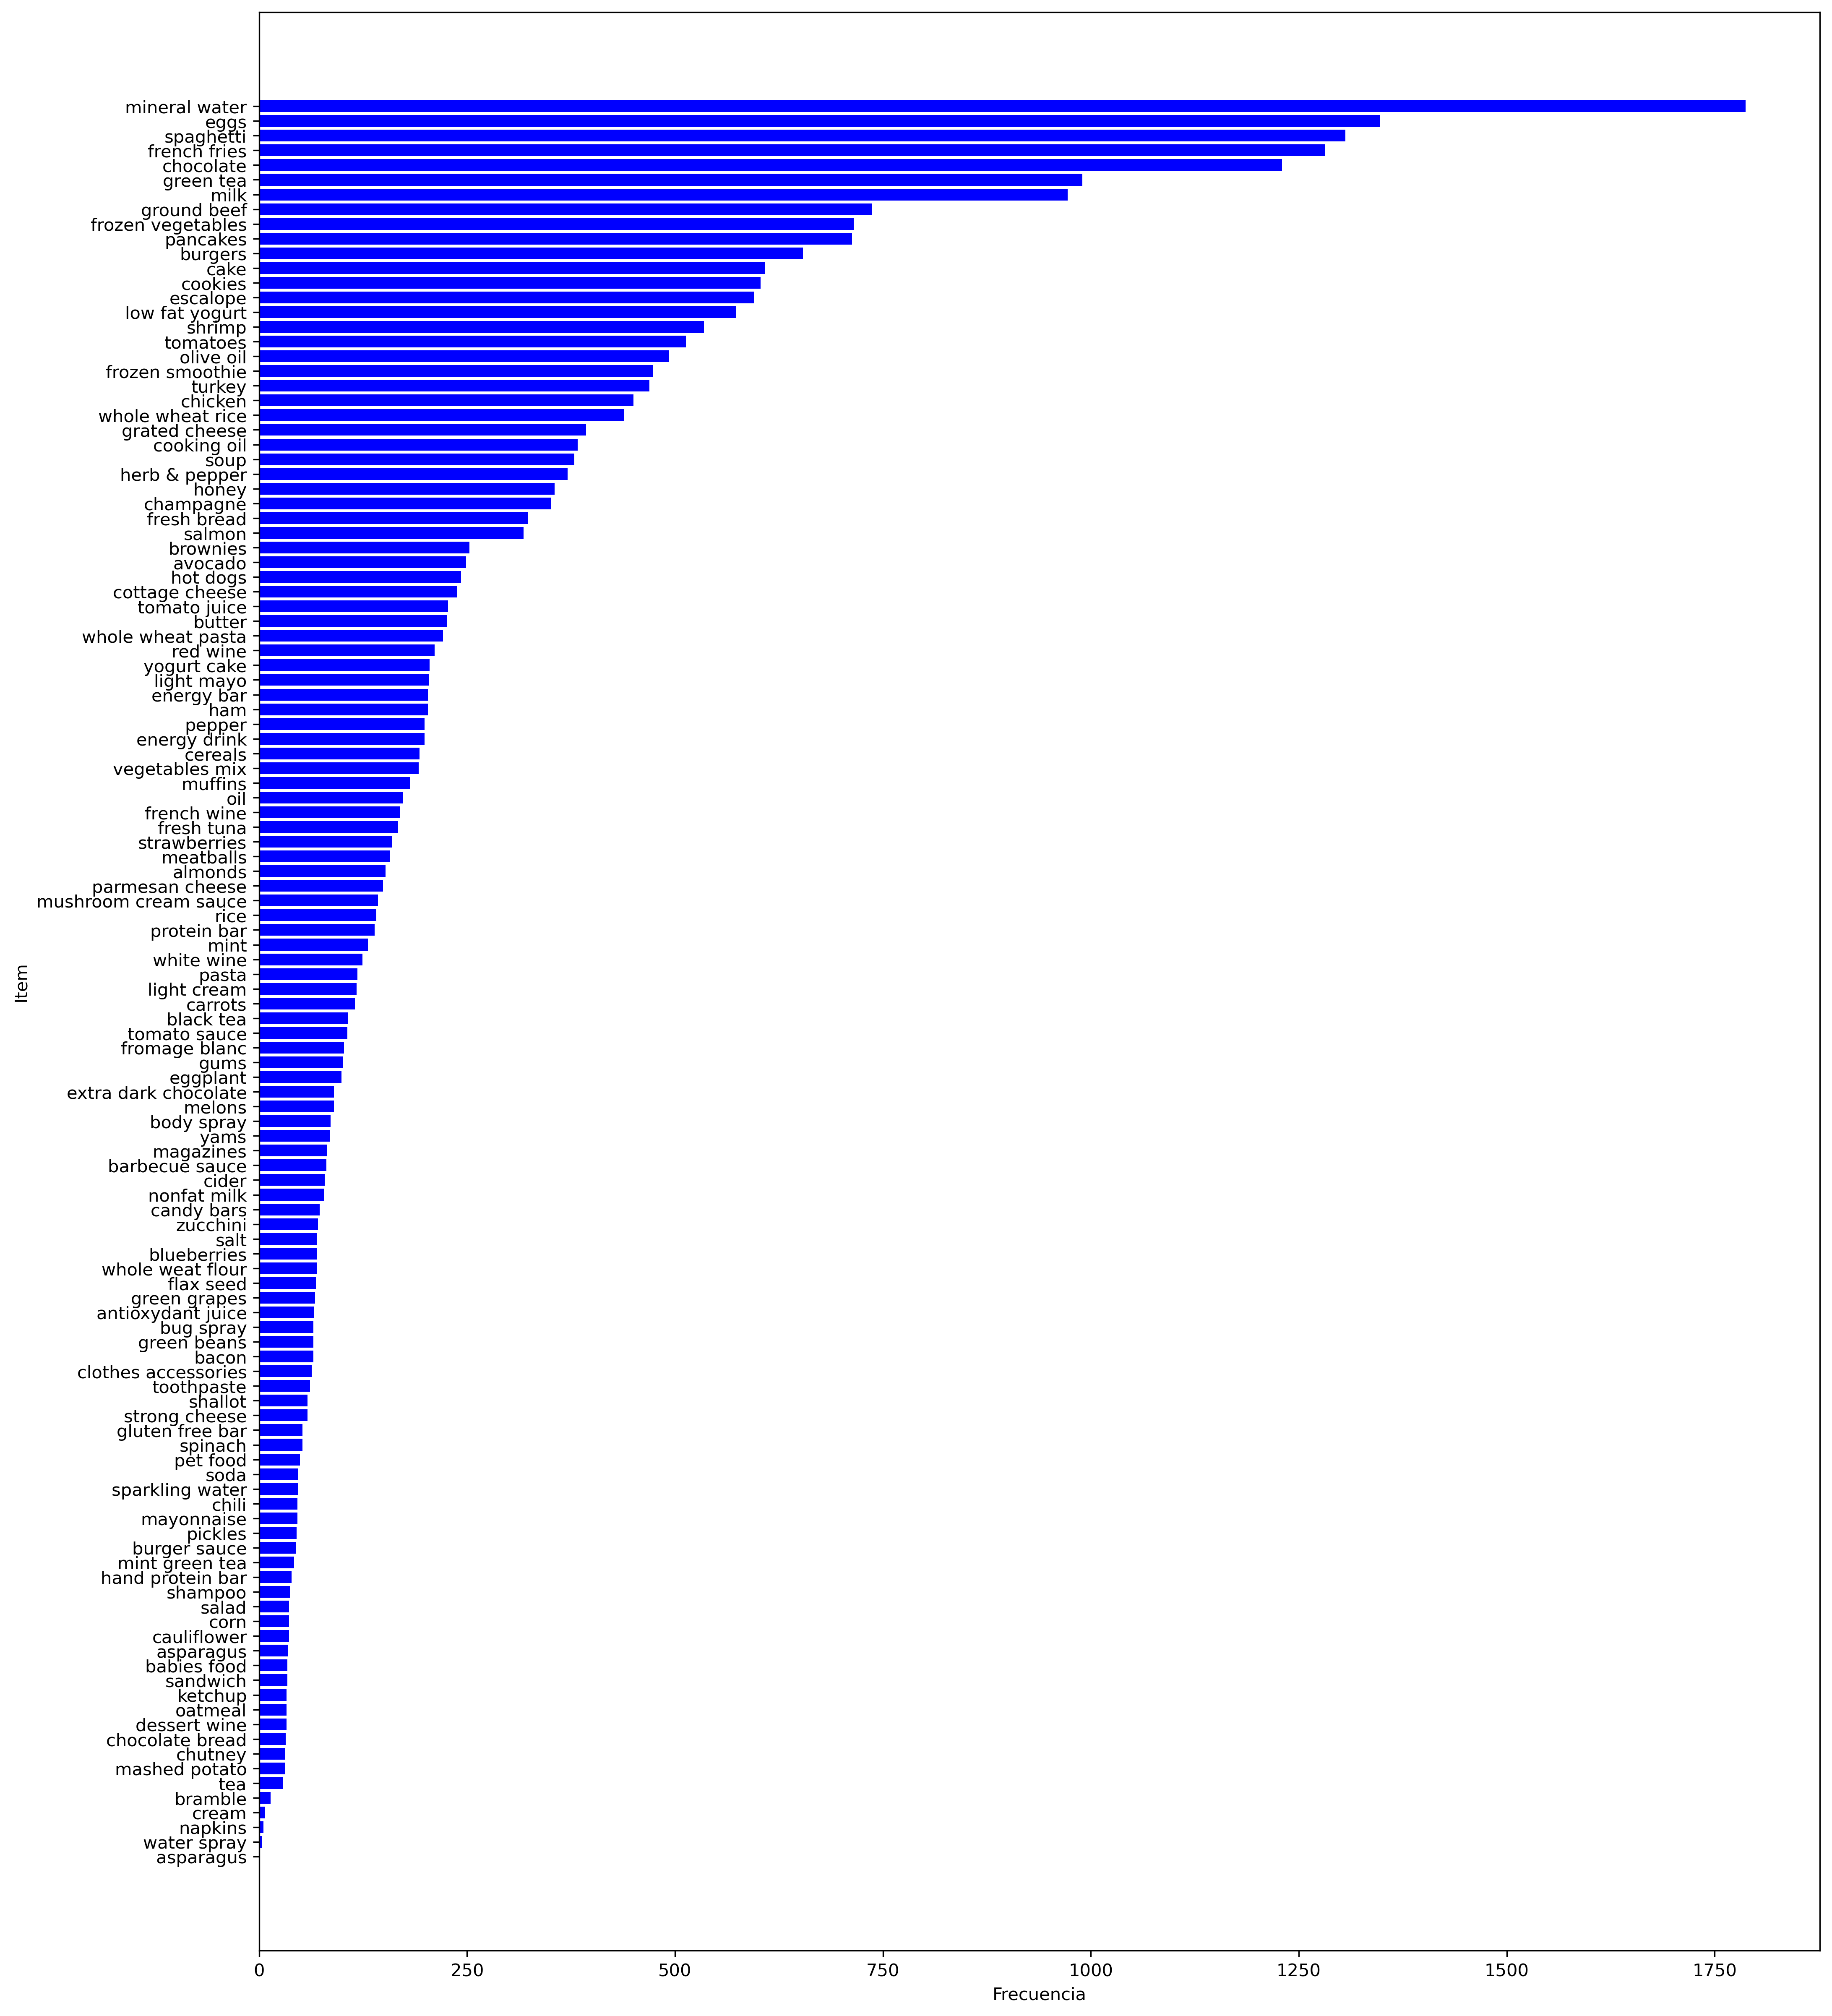

In [64]:
# Se genera un gráfico de barras
plt.figure(figsize=(16,20), dpi=300)
plt.ylabel('Item')
plt.xlabel('Frecuencia')
plt.barh(Lista['Item'], width=Lista['Frecuencia'], color='blue')
plt.show()

In [65]:
#Se crea una lista de listas a partir del dataframe y se remueven los 'NaN'
#level=0 especifica desde el primer índice
ListaMarket = DatosMarket.stack().groupby(level=0).apply(list).tolist()
ListaMarket

[['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spaghetti',
  'mineral water',
  'black tea',
  'salmon',
  'eggs',
  'chicken',
  'extra dark chocolate'],
 ['meatballs', 'milk', 'honey', 'french fries', 'protein bar'],
 ['red wine', 'shrimp', 'pasta', 'pepper', 'eggs', 'chocolate', 'shampoo'],
 ['rice', 'sparkling water'],
 ['spaghetti', 'mineral water', 'ham', 'body spray',

In [69]:
ReglasC1 = apriori(ListaMarket, 
                   min_support=0.01, 
                   min_confidence=0.3, 
                   min_lift=2)

In [70]:
ResultadosC1 = list(ReglasC1)
print(len(ResultadosC1)) #Total de reglas encontradas 

10


In [71]:
ResultadosC1

[RelationRecord(items=frozenset({'herb & pepper', 'ground beef'}), support=0.016, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'ground beef'}), confidence=0.3234501347708895, lift=3.2915549671393096)]),
 RelationRecord(items=frozenset({'ground beef', 'spaghetti'}), support=0.0392, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ground beef'}), items_add=frozenset({'spaghetti'}), confidence=0.39891451831750335, lift=2.2908567284695827)]),
 RelationRecord(items=frozenset({'milk', 'soup'}), support=0.0152, ordered_statistics=[OrderedStatistic(items_base=frozenset({'soup'}), items_add=frozenset({'milk'}), confidence=0.3007915567282322, lift=2.320922505619076)]),
 RelationRecord(items=frozenset({'olive oil', 'spaghetti'}), support=0.022933333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'olive oil'}), items_add=frozenset({'spaghetti'}), confidence=0.3488843813387424, lift=2.0035473660341254)]),
 Relati

In [72]:
pd.DataFrame(ResultadosC1)

,items,support,ordered_statistics
0,"(herb & pepper, ground beef)",0.016000,"[((herb & pepper), (ground beef), 0.3234501347..."
1,"(ground beef, spaghetti)",0.039200,"[((ground beef), (spaghetti), 0.39891451831750..."
2,"(milk, soup)",0.015200,"[((soup), (milk), 0.3007915567282322, 2.320922..."
3,"(olive oil, spaghetti)",0.022933,"[((olive oil), (spaghetti), 0.3488843813387424..."
4,"(red wine, spaghetti)",0.010267,"[((red wine), (spaghetti), 0.36492890995260663..."
5,"(eggs, mineral water, ground beef)",0.010133,"[((eggs, ground beef), (mineral water), 0.5066..."
6,"(milk, mineral water, frozen vegetables)",0.011067,"[((mineral water, frozen vegetables), (milk), ..."
7,"(milk, mineral water, ground beef)",0.011067,"[((milk, ground beef), (mineral water), 0.5030..."
8,"(mineral water, ground beef, spaghetti)",0.017067,"[((mineral water, ground beef), (spaghetti), 0..."
9,"(olive oil, mineral water, spaghetti)",0.010267,"[((olive oil, mineral water), (spaghetti), 0.3..."


In [73]:
for item in ResultadosC1:
  #El primer índice de la lista
  Emparejar = item[0]
  items = [x for x in Emparejar]
  print("Regla: " + str(item[0]))

  #El segundo índice de la lista
  print("Soporte: " + str(item[1]))

  #El tercer índice de la lista
  print("Confianza: " + str(item[2][0][2]))
  print("Elevación: " + str(item[2][0][3])) 
  print("=====================================") 

Regla: frozenset({'herb & pepper', 'ground beef'})
Soporte: 0.016
Confianza: 0.3234501347708895
Elevación: 3.2915549671393096
Regla: frozenset({'ground beef', 'spaghetti'})
Soporte: 0.0392
Confianza: 0.39891451831750335
Elevación: 2.2908567284695827
Regla: frozenset({'milk', 'soup'})
Soporte: 0.0152
Confianza: 0.3007915567282322
Elevación: 2.320922505619076
Regla: frozenset({'olive oil', 'spaghetti'})
Soporte: 0.022933333333333333
Confianza: 0.3488843813387424
Elevación: 2.0035473660341254
Regla: frozenset({'red wine', 'spaghetti'})
Soporte: 0.010266666666666667
Confianza: 0.36492890995260663
Elevación: 2.0956866957462097
Regla: frozenset({'eggs', 'mineral water', 'ground beef'})
Soporte: 0.010133333333333333
Confianza: 0.5066666666666666
Elevación: 2.1264689423614995
Regla: frozenset({'milk', 'mineral water', 'frozen vegetables'})
Soporte: 0.011066666666666667
Confianza: 0.30970149253731344
Elevación: 2.3896720103187765
Regla: frozenset({'milk', 'mineral water', 'ground beef'})
Soport

In [74]:
# configuracion2

ReglasC2 = apriori(ListaMarket, 
                   min_support=0.028, 
                   min_confidence=0.3, 
                   min_lift = 1.1)

In [75]:
ResultadosC2 = list(ReglasC2)

In [76]:
ResultadosC2 

[RelationRecord(items=frozenset({'burgers', 'eggs'}), support=0.0288, ordered_statistics=[OrderedStatistic(items_base=frozenset({'burgers'}), items_add=frozenset({'eggs'}), confidence=0.3302752293577982, lift=1.837584733073803)]),
 RelationRecord(items=frozenset({'chocolate', 'mineral water'}), support=0.05266666666666667, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chocolate'}), items_add=frozenset({'mineral water'}), confidence=0.32139951179820997, lift=1.3489067367020564)]),
 RelationRecord(items=frozenset({'mineral water', 'frozen vegetables'}), support=0.03573333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'frozen vegetables'}), items_add=frozenset({'mineral water'}), confidence=0.3748251748251748, lift=1.5731330784492508)]),
 RelationRecord(items=frozenset({'mineral water', 'ground beef'}), support=0.040933333333333335, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ground beef'}), items_add=frozenset({'mineral water'}), confi

In [77]:
pd.DataFrame(ResultadosC2)

,items,support,ordered_statistics
0,"(burgers, eggs)",0.028800,"[((burgers), (eggs), 0.3302752293577982, 1.837..."
1,"(chocolate, mineral water)",0.052667,"[((chocolate), (mineral water), 0.321399511798..."
2,"(mineral water, frozen vegetables)",0.035733,"[((frozen vegetables), (mineral water), 0.3748..."
3,"(mineral water, ground beef)",0.040933,"[((ground beef), (mineral water), 0.4165535956..."
4,"(ground beef, spaghetti)",0.039200,"[((ground beef), (spaghetti), 0.39891451831750..."
5,"(milk, mineral water)",0.048000,"[((milk), (mineral water), 0.3703703703703704,..."
6,"(pancakes, mineral water)",0.033733,"[((pancakes), (mineral water), 0.3548387096774..."
7,"(mineral water, spaghetti)",0.059733,"[((spaghetti), (mineral water), 0.343032159264..."


In [78]:
print(ResultadosC2[0])

RelationRecord(items=frozenset({'burgers', 'eggs'}), support=0.0288, ordered_statistics=[OrderedStatistic(items_base=frozenset({'burgers'}), items_add=frozenset({'eggs'}), confidence=0.3302752293577982, lift=1.837584733073803)])


In [79]:
print(ResultadosC2[1])
print(ResultadosC2[2])

RelationRecord(items=frozenset({'chocolate', 'mineral water'}), support=0.05266666666666667, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chocolate'}), items_add=frozenset({'mineral water'}), confidence=0.32139951179820997, lift=1.3489067367020564)])
RelationRecord(items=frozenset({'mineral water', 'frozen vegetables'}), support=0.03573333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'frozen vegetables'}), items_add=frozenset({'mineral water'}), confidence=0.3748251748251748, lift=1.5731330784492508)])


In [80]:
for item in ResultadosC2:
  #El primer índice de la lista
  Emparejar = item[0]
  items = [x for x in Emparejar]
  print("Regla: " + str(item[0]))

  #El segundo índice de la lista
  print("Soporte: " + str(item[1]))

  #El tercer índice de la lista
  print("Confianza: " + str(item[2][0][2]))
  print("Elevación: " + str(item[2][0][3])) 
  print("=====================================") 

Regla: frozenset({'burgers', 'eggs'})
Soporte: 0.0288
Confianza: 0.3302752293577982
Elevación: 1.837584733073803
Regla: frozenset({'chocolate', 'mineral water'})
Soporte: 0.05266666666666667
Confianza: 0.32139951179820997
Elevación: 1.3489067367020564
Regla: frozenset({'mineral water', 'frozen vegetables'})
Soporte: 0.03573333333333333
Confianza: 0.3748251748251748
Elevación: 1.5731330784492508
Regla: frozenset({'mineral water', 'ground beef'})
Soporte: 0.040933333333333335
Confianza: 0.41655359565807326
Elevación: 1.7482663499919135
Regla: frozenset({'ground beef', 'spaghetti'})
Soporte: 0.0392
Confianza: 0.39891451831750335
Elevación: 2.2908567284695827
Regla: frozenset({'milk', 'mineral water'})
Soporte: 0.048
Confianza: 0.3703703703703704
Elevación: 1.5544363613753656
Regla: frozenset({'pancakes', 'mineral water'})
Soporte: 0.03373333333333333
Confianza: 0.3548387096774194
Elevación: 1.489250320414463
Regla: frozenset({'mineral water', 'spaghetti'})
Soporte: 0.05973333333333333
Con

In [82]:
#Configuracion3
ReglasC3 = apriori(ListaMarket, 
                   min_support=0.040, 
                   min_confidence=0.3, 
                   min_lift = 1.2)

In [83]:
ResultadosC3 = list(ReglasC3)

In [84]:
ResultadosC3 

[RelationRecord(items=frozenset({'chocolate', 'mineral water'}), support=0.05266666666666667, ordered_statistics=[OrderedStatistic(items_base=frozenset({'chocolate'}), items_add=frozenset({'mineral water'}), confidence=0.32139951179820997, lift=1.3489067367020564)]),
 RelationRecord(items=frozenset({'mineral water', 'ground beef'}), support=0.040933333333333335, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ground beef'}), items_add=frozenset({'mineral water'}), confidence=0.41655359565807326, lift=1.7482663499919135)]),
 RelationRecord(items=frozenset({'milk', 'mineral water'}), support=0.048, ordered_statistics=[OrderedStatistic(items_base=frozenset({'milk'}), items_add=frozenset({'mineral water'}), confidence=0.3703703703703704, lift=1.5544363613753656)]),
 RelationRecord(items=frozenset({'mineral water', 'spaghetti'}), support=0.05973333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'spaghetti'}), items_add=frozenset({'mineral water'}), confiden

In [85]:
pd.DataFrame(ResultadosC3)

,items,support,ordered_statistics
0,"(chocolate, mineral water)",0.052667,"[((chocolate), (mineral water), 0.321399511798..."
1,"(mineral water, ground beef)",0.040933,"[((ground beef), (mineral water), 0.4165535956..."
2,"(milk, mineral water)",0.048000,"[((milk), (mineral water), 0.3703703703703704,..."
3,"(mineral water, spaghetti)",0.059733,"[((spaghetti), (mineral water), 0.343032159264..."


In [86]:
for item in ResultadosC3:
  #El primer índice de la lista
  Emparejar = item[0]
  items = [x for x in Emparejar]
  print("Regla: " + str(item[0]))

  #El segundo índice de la lista
  print("Soporte: " + str(item[1]))

  #El tercer índice de la lista
  print("Confianza: " + str(item[2][0][2]))
  print("Elevación: " + str(item[2][0][3])) 
  print("=====================================") 

Regla: frozenset({'chocolate', 'mineral water'})
Soporte: 0.05266666666666667
Confianza: 0.32139951179820997
Elevación: 1.3489067367020564
Regla: frozenset({'mineral water', 'ground beef'})
Soporte: 0.040933333333333335
Confianza: 0.41655359565807326
Elevación: 1.7482663499919135
Regla: frozenset({'milk', 'mineral water'})
Soporte: 0.048
Confianza: 0.3703703703703704
Elevación: 1.5544363613753656
Regla: frozenset({'mineral water', 'spaghetti'})
Soporte: 0.05973333333333333
Confianza: 0.3430321592649311
Elevación: 1.4396984860027886
